<a href="https://colab.research.google.com/github/hema-comp-bio/foxp3-vs-ikba-comparative-analysis/blob/main/FOXP3_and_IkBa_Comparative_Protein_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving foxp3.fasta.txt to foxp3.fasta.txt


**protein** **foxp3** -

In [3]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.7 MB/s eta 0:00:00


In [4]:
from Bio import SeqIO

In [5]:
record = SeqIO.read("foxp3.fasta.txt", "fasta")

**protein** **foxp3** **information** -

In [6]:
sequence = str(record.seq)

print("Sequence ID:", record.id)
print("Sequence Length:", len(sequence), "amino acids")
print("First 60 residues:", sequence[:60])

Sequence ID: sp|Q9BZS1|FOXP3_HUMAN
Sequence Length: 431 amino acids
First 60 residues: MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQGRDLRGGAHASSSS


**general** **analysis** **of** **protein** **foxp3** -

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

analysis = ProteinAnalysis(sequence)

In [12]:
#Amino Acid Composition
aa_comp = analysis.amino_acids_percent
for aa, freq in aa_comp.items():
    print(f"{aa}: {round(freq, 2)}%")

# Molecular Weight
print("\nMolecular Weight:", round(analysis.molecular_weight(), 2), "Da")

# Isoelectric Point
print("Isoelectric Point (pI):", round(analysis.isoelectric_point(), 2))



A: 9.74%
C: 2.09%
D: 2.78%
E: 4.87%
F: 4.18%
G: 6.26%
H: 3.94%
I: 1.62%
K: 4.64%
L: 10.9%
M: 2.55%
N: 3.02%
P: 11.14%
Q: 4.18%
R: 6.26%
S: 9.28%
T: 4.41%
V: 5.1%
W: 2.09%
Y: 0.93%

Molecular Weight: 47243.74 Da
Isoelectric Point (pI): 9.52


**aa** **composition** **plot** **for** **foxp3** -

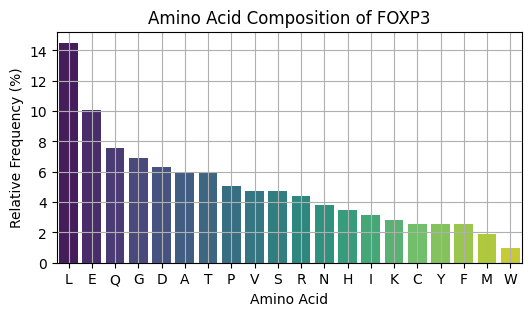

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converting dictionary to DataFrame
df = pd.DataFrame.from_dict(aa_comp, orient='index', columns=['Frequency'])
df = df.sort_values('Frequency', ascending=False)

# Plot
plt.figure(figsize=(6,3))
sns.barplot(
    x=df.index,
    y='Frequency',
    data=df,
    hue=df.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Amino Acid Composition of FOXP3')
plt.xlabel('Amino Acid')
plt.ylabel('Relative Frequency (%)')
plt.grid(True)
plt.show()

**locating** **motifs** **of** **foxp3** **protein** -

In [18]:
import re

def find_kr_rich(seq): # NLS of foxp3
    return [(m.group(), m.start()) for m in re.finditer(r"[KR]{2,}", seq)]

kr_motifs = find_kr_rich(sequence)
print("KR-rich Motifs (NLS sequences):", kr_motifs)

KR-rich Motifs (NLS sequences): [('RK', 177), ('RR', 308), ('RKKR', 413)]


In [19]:
def find_st_rich(seq): #S/T rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[ST]{3,}", seq)]

st_motifs = find_st_rich(sequence)
print("S/T-rich motifs (phosphorylation sites):", st_motifs)

S/T-rich motifs (phosphorylation sites): [('SSSS', 56)]


In [20]:
def find_proline_motifs(seq): # Proline motifs
    return [(m.group(), m.start()) for m in re.finditer(r"P.{1,2}P", seq)]

proline_motifs = find_proline_motifs(sequence)
print("Proline-rich motifs (PXP)/(PXXP):", proline_motifs)

Proline-rich motifs (PXP)/(PXXP): [('PNP', 1), ('PGKP', 5), ('PSP', 17), ('PMPP', 62), ('PTLP', 71), ('PLP', 87), ('PGLP', 146), ('PNP', 171), ('PVVP', 289), ('PTP', 426)]


In [21]:
def find_rgg_motifs(seq): #RGG rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[RG]{2,3}", seq)]

rgg_motifs = find_rgg_motifs(sequence)
print("RGG/Arg-Gly-rich motifs:", rgg_motifs)

RGG/Arg-Gly-rich motifs: [('RG', 38), ('GG', 41), ('GR', 46), ('RGG', 50), ('GR', 227), ('RR', 308)]


In [24]:
#Putative NES Motifs - Based on general hydrophobic residues
def find_nes(seq):
    return [(m.group(), m.start()) for m in re.finditer(r"[LIVFM].{2,3}[LIVFM].{2,3}[LIVFM]", seq)]

nes_motifs = find_nes(sequence)
print("Putative NES motifs:", nes_motifs)

Putative NES motifs: [('LPTLPLVM', 70), ('LGPLPHL', 85), ('FMHQLSTV', 101), ('VLQVHPL', 116), ('VASLEWV', 154), ('LQREMVQSL', 233), ('LSAMQAHL', 252), ('LFAVRRHL', 304), ('FPEFLHNM', 320), ('FHNMRPPF', 332), ('LNEIYHWF', 359), ('LHKCFVRV', 390), ('VWTVDEL', 404)]


In [26]:
#Literature Based NES Motifs
known_nes = ['QLQLPTL', 'QSLEQQL']

for nes in known_nes:
    if nes in sequence:
        print(f"Literature NES motifs found: {nes} at position {sequence.find(nes)}")


Literature NES motifs found: QLQLPTL at position 67
Literature NES motifs found: QSLEQQL at position 239


In [23]:
def find_lxxll(seq): # LXXLL seq
    return [(m.group(), m.start()) for m in re.finditer(r"L.{2}LL", seq)]

lxxll_motifs = find_lxxll(sequence)
print("LXXLL motifs (receptor interaction):", lxxll_motifs)

LXXLL motifs (receptor interaction): [('LQALL', 91)]


**forkhead** **domain** **of** **foxp3** -

In [28]:
# Forkhead (DNA-binding) domain: residues 337–421
forkhead_domain = sequence[336:421]
print("Forkhead (DNA-binding) domain of FOXP3:")
print(forkhead_domain)
print(f"\nLength: {len(forkhead_domain)} amino acids")

Forkhead (DNA-binding) domain of FOXP3:
RPPFTYATLIRWAILEAPEKQRTLNEIYHWFTRMFAFFRNHPATWKNAIRHNLSLHKCFVRVESEKGAVWTVDELEFRKKRSQRP

Length: 85 amino acids


**protein** **ikba** -

In [50]:
from google.colab import files
uploaded = files.upload()

Saving ikba.fasta.txt to ikba.fasta.txt


In [51]:
record = SeqIO.read("ikba.fasta.txt", "fasta")

**ikba** **protein** **information** -

In [53]:
sequence = str(record.seq)

print("Sequence ID:", record.id)
print("Sequence Length:", len(sequence), "amino acids")
print("First 60 residues:", sequence[:60])


Sequence ID: sp|P25963|IKBA_HUMAN
Sequence Length: 317 amino acids
First 60 residues: MFQAAERPQEWAMEGPRDGLKKERLLDDRHDSGLDSMKDEEYEQMVKELQEIRLEPQEVP


**general** **analysis** **of** **protein** -

In [56]:
analysis = ProteinAnalysis(sequence)

# Amino acid composition
aa_comp = analysis.amino_acids_percent
print("Amino acid composition (%):")
for aa, freq in aa_comp.items():
    print(f"{aa}: {round(freq, 2)}%")

# Molecular weight
print("\nMolecular Weight:", round(analysis.molecular_weight(), 2), "Da")

# Isoelectric point
print("Isoelectric Point (pI):", round(analysis.isoelectric_point(), 2))


Amino acid composition (%):
A: 5.99%
C: 2.52%
D: 6.31%
E: 10.09%
F: 2.52%
G: 6.94%
H: 3.47%
I: 3.15%
K: 2.84%
L: 14.51%
M: 1.89%
N: 3.79%
P: 5.05%
Q: 7.57%
R: 4.42%
S: 4.73%
T: 5.99%
V: 4.73%
W: 0.95%
Y: 2.52%

Molecular Weight: 35608.53 Da
Isoelectric Point (pI): 4.57


**aa** **composition** **plot** **for** **ikba** -

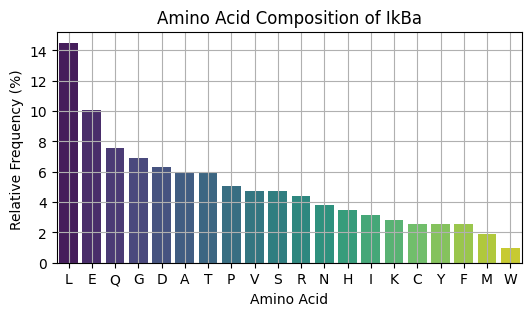

In [81]:
# Converting dictionary to DataFrame - ikba
df = pd.DataFrame.from_dict(aa_comp, orient='index', columns=['Frequency'])
df = df.sort_values('Frequency', ascending=False)

# Plot - ikba
plt.figure(figsize=(6,3))
sns. barplot(
    x=df.index,
    y='Frequency',
    data=df,
    hue=df.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Amino Acid Composition of IkBa')
plt.xlabel('Amino Acid')
plt.ylabel('Relative Frequency (%) ')
plt. grid (True)
plt. show()

**loacating** **motifs** **of** **ikba** **protein** -

In [63]:
def find_pest_like(seq): # PEST like motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[PEST]{4,}", seq)]

pest_like = find_pest_like(sequence)
print("PEST-like motifs:", pest_like)

PEST-like motifs: [('PESE', 280), ('TESE', 290)]


In [64]:
def find_ed_stretch(seq): # E/D rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[ED]{3,}", seq)]

ed_stretch = find_ed_stretch(sequence)
print("E/D-rich motifs:", ed_stretch)

E/D-rich motifs: [('DEE', 38), ('EDEE', 283), ('EDE', 299)]


In [67]:
#Ankyrin repeats based on conserved sequences
def find_ankyrin_repeat_like(seq):
    return [(m.group(), m.start()) for m in re.finditer(r"[LIVM].{2}[GAS].{4}[DE].{3}[LIVM]", seq)]

ankyrin_like = find_ankyrin_repeat_like(sequence)
print("Ankyrin-like motifs:", ankyrin_like)

Ankyrin-like motifs: []


In [69]:
# Ankyrin domain recognition based on actual sequence
ankyrin_domain = sequence[66:287]
print(ankyrin_domain)

KQQLTEDGDSFLHLAIIHEEKALTMEVIRQVKGDLAFLNFQNNLQQTPLHLAVITNQPEIAEALLGAGCDPELRDFRGNTPLHLACEQGCLASVGVLTQSCTTPHLHSILKATNYNGHTCLHLASIHGYLGIVELLVSLGADVNAQEPCNGRTALHLAVDLQNPDLVSLLLKCGADVNRVTYQGYSPYQLTWGRPSTRIQQQLGQLTLENLQMLPESEDEE


In [71]:
def find_st_rich(seq): # S/T rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[ST]{3,}", seq)]

st_motifs = find_st_rich(sequence)
print("S/T-rich motifs (phosphorylation sites):", st_motifs)

S/T-rich motifs (phosphorylation sites): []


In [72]:
def find_proline_motifs(seq): # Porline rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"P.{1,2}P", seq)]

proline_motifs = find_proline_motifs(sequence)
print("Proline-rich motifs (PXXP):", proline_motifs)

Proline-rich motifs (PXXP): []


In [73]:
def find_rgg_motifs(seq): #RGG rich motifs
    return [(m.group(), m.start()) for m in re.finditer(r"[RG]{2,3}", seq)]

rgg_motifs = find_rgg_motifs(sequence)
print("RGG/Arg-Gly-rich motifs:", rgg_motifs)

RGG/Arg-Gly-rich motifs: [('RG', 60), ('RG', 142), ('GR', 216), ('GR', 258), ('GG', 310)]
